In [1]:
# importing important libraries for reading the dataset i;e PANDAS and NUMPY

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading dataset and assigning the data to a variable

In [4]:
df = pd.read_csv('blackfriday_train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
# checking null values in the dataset

In [6]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
# a lots of nan are shown in two columns

In [8]:
# checking for dataset type, object or int type

In [9]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [10]:
# dropping a column "User_ID" because it seems like a nominal data column

In [11]:
df = df.drop(columns='User_ID')

In [12]:
# importing encoder for encoding some columns which is present as object datatype

In [13]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [14]:
lab_enc = LabelEncoder()

In [15]:
df['Product_ID'] = lab_enc.fit_transform(df['Product_ID'])

In [16]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [17]:
ord_enc = OrdinalEncoder(categories=[['F','M']])

df['Gender'] = ord_enc.fit_transform(df[['Gender']])

In [18]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
df['Age'].mode()

0    26-35
Name: Age, dtype: object

In [20]:
df['Age'] = lab_enc.fit_transform(df['Age'])

In [21]:
df['City_Category'].mode()

0    B
Name: City_Category, dtype: object

In [22]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [23]:
ord_enc = OrdinalEncoder(categories=[['A','C','B']])

df['City_Category'] = ord_enc.fit_transform(df[['City_Category']])

In [24]:
df['Stay_In_Current_City_Years'].mode()

0    1
Name: Stay_In_Current_City_Years, dtype: object

In [25]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [26]:
df['Stay_In_Current_City_Years'] = lab_enc.fit_transform(df['Stay_In_Current_City_Years'])

In [27]:
# after encoding to required column, take a look on dataset

In [28]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,672,0.0,0,10,0.0,2,0,3,NaN,NaN,8370
1,2376,0.0,0,10,0.0,2,0,1,6.0,14.0,15200
2,852,0.0,0,10,0.0,2,0,12,NaN,NaN,1422
3,828,0.0,0,10,0.0,2,0,12,14.0,NaN,1057
4,2734,1.0,6,16,1.0,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,3567,1.0,5,13,2.0,1,1,20,NaN,NaN,368
550064,3568,0.0,2,1,1.0,3,0,20,NaN,NaN,371
550065,3568,0.0,2,15,2.0,4,1,20,NaN,NaN,137
550066,3568,0.0,6,1,1.0,2,0,20,NaN,NaN,365


In [29]:
# because column having null values are such type data that we cannot fill these NaNs by mean or mode. Because, we tried a lots of time by mode or mean method, by still saw NaNs. So, filled NaN by zero.

In [30]:
df['Product_Category_1'].mode()

0    5
Name: Product_Category_1, dtype: int64

In [31]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [32]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [33]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)

In [34]:
df['Product_Category_3'].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [35]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [36]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)

In [37]:
# checking once more time for NaN

In [38]:
df.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [39]:
# changing required column float datatype to int datatype

In [40]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

In [41]:
df.dtypes

Product_ID                      int32
Gender                        float64
Age                             int32
Occupation                      int64
City_Category                 float64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2              int32
Product_Category_3              int32
Purchase                        int64
dtype: object

In [42]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,672,0.0,0,10,0.0,2,0,3,0,0,8370
1,2376,0.0,0,10,0.0,2,0,1,6,14,15200
2,852,0.0,0,10,0.0,2,0,12,0,0,1422
3,828,0.0,0,10,0.0,2,0,12,14,0,1057
4,2734,1.0,6,16,1.0,4,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,3567,1.0,5,13,2.0,1,1,20,0,0,368
550064,3568,0.0,2,1,1.0,3,0,20,0,0,371
550065,3568,0.0,2,15,2.0,4,1,20,0,0,137
550066,3568,0.0,6,1,1.0,2,0,20,0,0,365


In [43]:
# importing libraries for visualization for dataset
# for checking how is the trend of the dataset
# how data is scattered, it is normally distributed or non_normal

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# first distribution plot

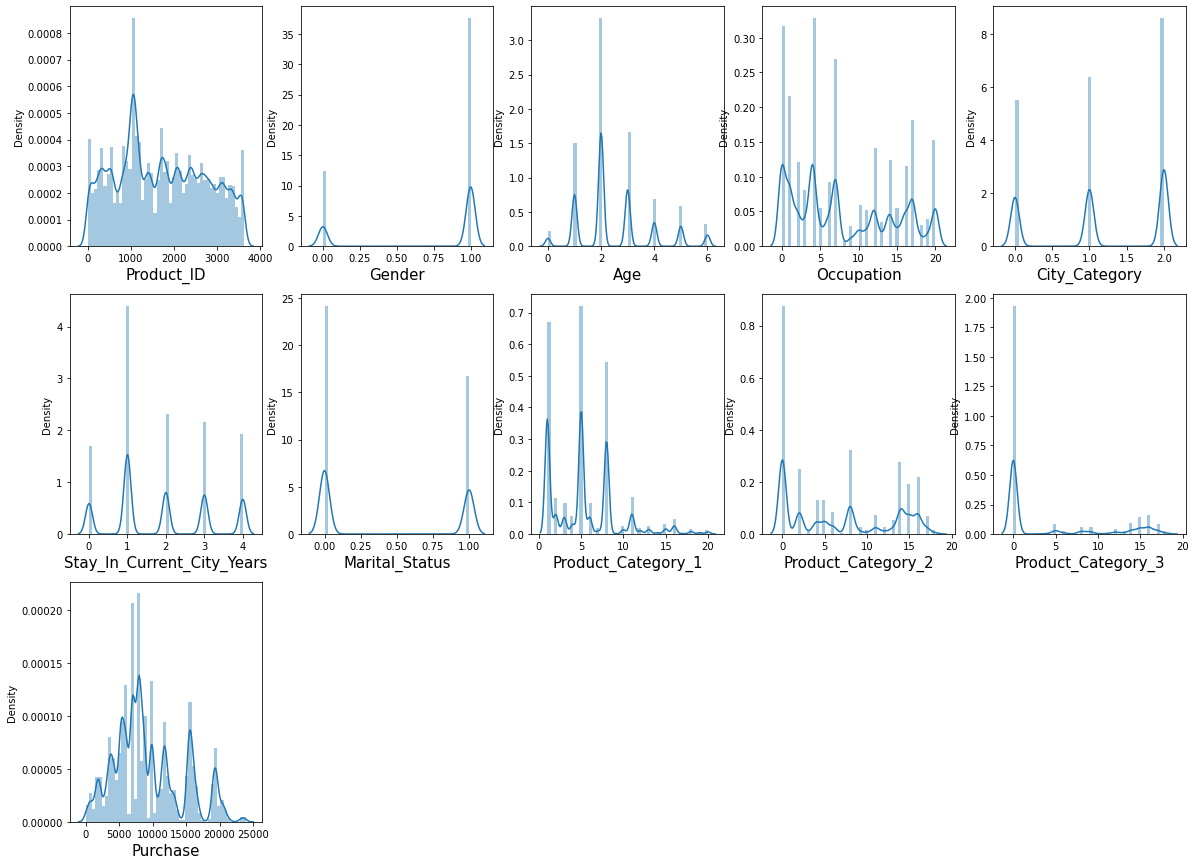

In [46]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    ax=plt.subplot(3,5,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)
    
    plotnumber+=1
    
plt.show()

In [47]:
# data is shown as it is not normally ditributed. It is not in normal shape.

In [48]:
# second boxplot for seeing outliers. We will also check for outliers by using quantiles.

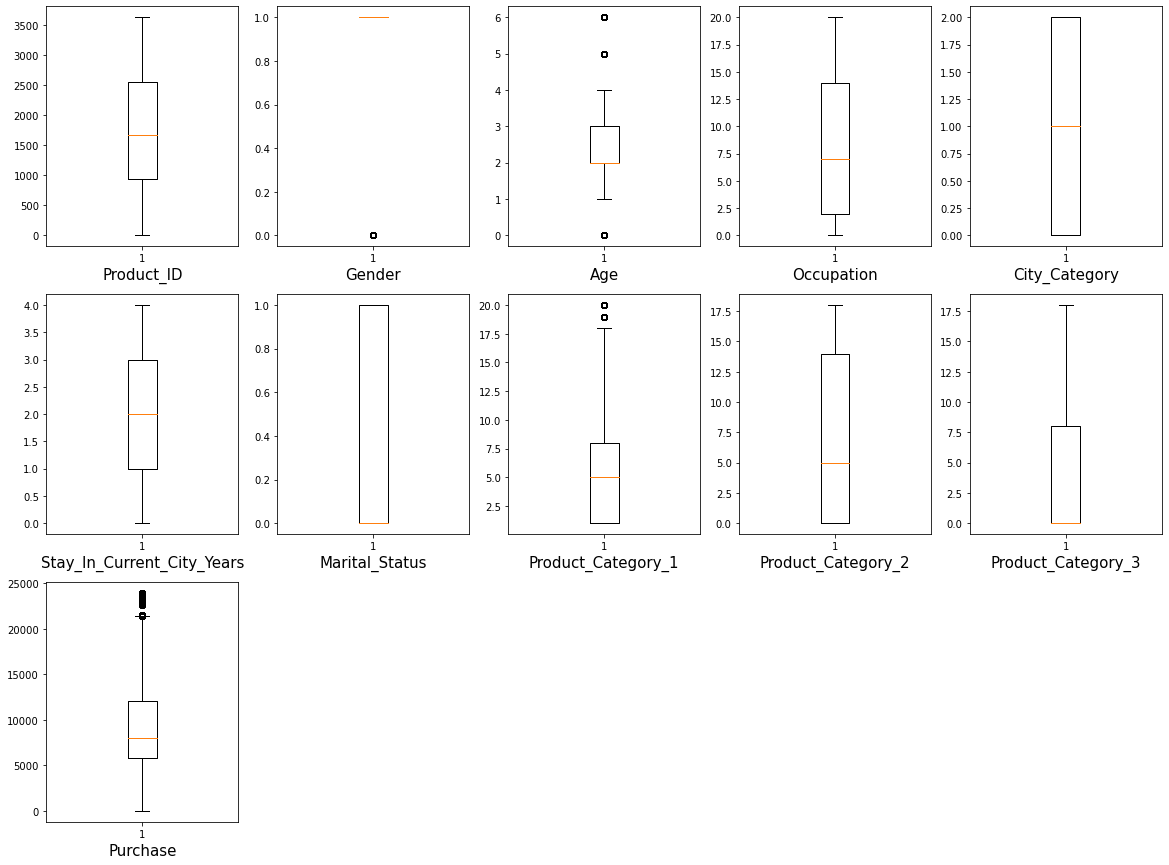

In [49]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    ax=plt.subplot(3,5,plotnumber)
    plt.boxplot(df[column])
    plt.xlabel(column,fontsize=15)
    
    plotnumber+=1
    
plt.show()

In [50]:
# some of outliers are shown only in our target variable. We will not do any changes to our target variable.Further, we will try to checking outliers by using quantiles.

In [51]:
# count plot for each variable individually

In [52]:
# countplot for column "Gender"

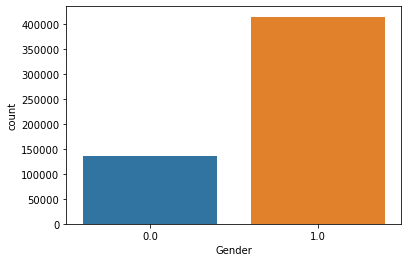

In [53]:
sns.countplot(df['Gender'])
plt.show()

In [54]:
# according to above count plot females are less comparison of male customers

In [55]:
# countplot for column "Age"

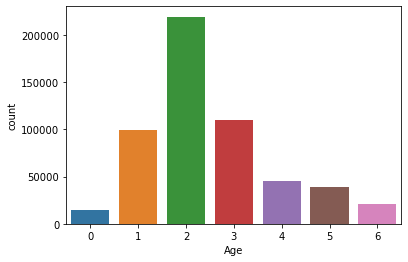

In [56]:
sns.countplot(df['Age'])
plt.show()

In [57]:
# according to above countplot most of the customers are of age category "26-35"

In [58]:
# countplot for column "Occupation"

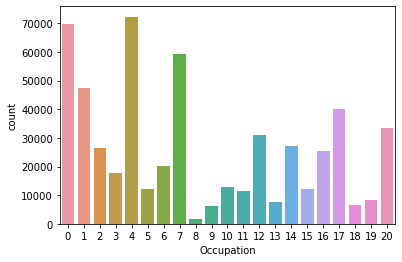

In [59]:
sns.countplot(df['Occupation'])
plt.show()

In [60]:
# according to above countplot higher occupation of customers are of "4" category and lower occupation of customers are of "8" category.

In [61]:
# countplot for city category

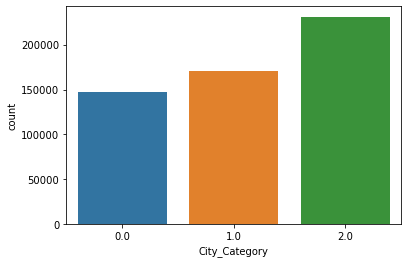

In [62]:
sns.countplot(df['City_Category'])
plt.show()

In [63]:
# according to above countplot, most of customers  relate to city_category "B"

In [64]:
# countplot for column  Stay_In_Current_City_Years

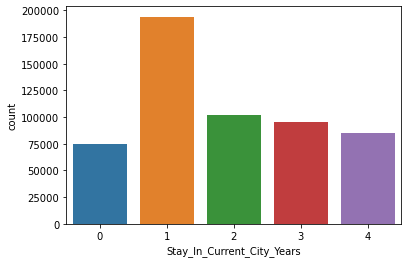

In [65]:
sns.countplot(df['Stay_In_Current_City_Years'])
plt.show()

In [66]:
# according to above countplot category of "1" is higher

In [67]:
# countplot for Marital_Status

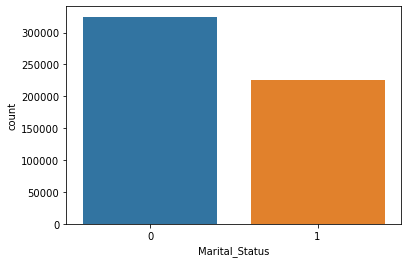

In [68]:
sns.countplot(df['Marital_Status'])
plt.show()

In [69]:
# according to above countplot, I think that unmarried are more than married customers

In [70]:
# countplot for Product_Category_1

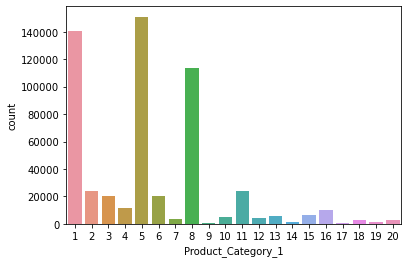

In [71]:
sns.countplot(df['Product_Category_1'])
plt.show()

In [72]:
# according to above countplot category "5" is high

In [73]:
# countplot for Product_Category_2

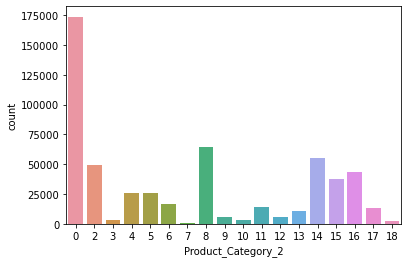

In [74]:
sns.countplot(df['Product_Category_2'])
plt.show()

In [75]:
# according to above countplot category "8" is high

In [76]:
# countplot for Product_Category_3

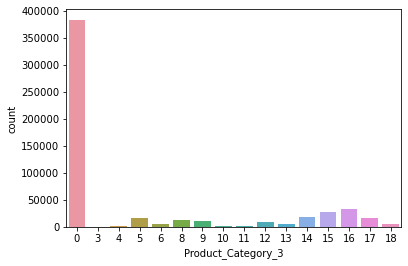

In [77]:
sns.countplot(df['Product_Category_3'])
plt.show()

In [78]:
# according to above countplot category "16" is high

In [79]:
# let's check for statistics of dataset

In [80]:
df.describe()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1707.473323,0.753105,2.496430,8.076707,1.151714,1.858418,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1012.201109,0.431205,1.353632,6.522660,0.815963,1.289443,0.491770,3.936211,6.215492,6.250712,5023.065394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,930.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1666.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,2550.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,3630.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [81]:
# finding Quantiles and IQR for dataset, for checking outliers of dataset

In [82]:
q1 = df.quantile(0.25)


q3 = df.quantile(0.75)


iqr = q3 - q1

In [83]:
print(q1)

Product_ID                     930.0
Gender                           1.0
Age                              2.0
Occupation                       2.0
City_Category                    0.0
Stay_In_Current_City_Years       1.0
Marital_Status                   0.0
Product_Category_1               1.0
Product_Category_2               0.0
Product_Category_3               0.0
Purchase                      5823.0
Name: 0.25, dtype: float64


In [84]:
print(q3)

Product_ID                     2550.0
Gender                            1.0
Age                               3.0
Occupation                       14.0
City_Category                     2.0
Stay_In_Current_City_Years        3.0
Marital_Status                    1.0
Product_Category_1                8.0
Product_Category_2               14.0
Product_Category_3                8.0
Purchase                      12054.0
Name: 0.75, dtype: float64


In [85]:
print(iqr)

Product_ID                    1620.0
Gender                           0.0
Age                              1.0
Occupation                      12.0
City_Category                    2.0
Stay_In_Current_City_Years       2.0
Marital_Status                   1.0
Product_Category_1               7.0
Product_Category_2              14.0
Product_Category_3               8.0
Purchase                      6231.0
dtype: float64


In [86]:
# now with the help of Quantiles and IQR, we will check for outliers individually for each columns and will remove outliers from required columns.

In [87]:
# for column "Gender"

In [88]:
gen_high = (q3.Gender + (1.5 * iqr.Gender))
gen_high

1.0

In [89]:
index = np.where(df['Gender'] > gen_high)
index

(array([], dtype=int64),)

In [90]:
gen_low = (q1.Gender - (1.5 * iqr.Gender))
gen_low

1.0

In [91]:
index = np.where(df['Gender'] < gen_low)
index

(array([     0,      1,      2, ..., 550065, 550066, 550067], dtype=int64),)

In [92]:
# some outliers are shown, let's remove them from dataset.

In [93]:
# dropping outliers 

In [94]:
df = df.drop(df.index[index])

In [95]:
# checking shape of dataset after removing the outliers

In [96]:
df.shape

(414259, 11)

In [97]:
# for column "Age"

In [98]:
age_high = (q3.Age + (1.5 * iqr.Age))
age_high

4.5

In [99]:
index = np.where(df['Age'] > age_high)
index

(array([     0,     36,     37, ..., 414241, 414246, 414258], dtype=int64),)

In [100]:
df = df.drop(df.index[index])

In [101]:
df.shape

(369231, 11)

In [102]:
age_low = (q1.Age - (1.5 * iqr.Age))
age_low

0.5

In [103]:
index = np.where(df['Age'] < age_low)
index

(array([    35,     36,     37, ..., 369145, 369204, 369212], dtype=int64),)

In [104]:
# some outliers are shown in this column

In [105]:
# let's remove them also

In [106]:
df = df.drop(df.index[index])

In [107]:
# checking the shape of the dataset after removing the outliers

In [108]:
df.shape

(359212, 11)

In [109]:
# for column "Occupation"

In [110]:
occ_high = (q3.Occupation + (1.5 * iqr.Occupation))
occ_high

32.0

In [111]:
index = np.where(df['Occupation'] > occ_high)
index

(array([], dtype=int64),)

In [112]:
occ_low = (q1.Occupation - (1.5 * iqr.Occupation))
occ_low

-16.0

In [113]:
index = np.where(df['Occupation'] < occ_low)
index

(array([], dtype=int64),)

In [114]:
# no outliers are shown in this column 

In [115]:
# for column City_Category

In [116]:
cc_high = (q3.City_Category + (1.5 * iqr.City_Category))
cc_high

5.0

In [117]:
index = np.where(df['City_Category'] > cc_high)
index

(array([], dtype=int64),)

In [118]:
cc_low = (q1.City_Category - (1.5 * iqr.City_Category))
cc_low

-3.0

In [119]:
index = np.where(df['City_Category'] < cc_low)
index

(array([], dtype=int64),)

In [120]:
# no outliers are shown

In [121]:
# for columm Stay_In_Current_City_Years

In [122]:
s_high = (q3.Stay_In_Current_City_Years + (1.5 * iqr.Stay_In_Current_City_Years))
s_high

6.0

In [123]:
index = np.where(df['Stay_In_Current_City_Years'] > s_high)
index

(array([], dtype=int64),)

In [124]:
s_low = (q1.Stay_In_Current_City_Years - (1.5 * iqr.Stay_In_Current_City_Years))
s_low

-2.0

In [125]:
index = np.where(df['Stay_In_Current_City_Years'] < s_low)
index

(array([], dtype=int64),)

In [126]:
# no outliers are shown in this column

In [127]:
# for column Marital_Status

In [128]:
ms_high = (q3.Marital_Status + (1.5 * iqr.Marital_Status))
ms_high

2.5

In [129]:
index = np.where(df['Marital_Status'] > ms_high)
index

(array([], dtype=int64),)

In [130]:
ms_low = (q1.Marital_Status - (1.5  * iqr.Marital_Status))
ms_low

-1.5

In [131]:
index = np.where(df['Marital_Status'] < ms_low)
index

(array([], dtype=int64),)

In [132]:
# no outliers are shown in this column also

In [133]:
# for column Product_Category_1

In [134]:
p1_high = (q3.Product_Category_1 + (1.5 * iqr.Product_Category_1))
p1_high

18.5

In [135]:
index = np.where(df['Product_Category_1'] > p1_high)
index

(array([356757, 356758, 356759, ..., 359209, 359210, 359211], dtype=int64),)

In [136]:
# some outliers are shown in this column, let's drop them

In [137]:
df = df.drop(df.index[index])

In [138]:
# checking shape of dataset after dropping the outliers

In [139]:
df.shape

(356757, 11)

In [140]:
p1_low = (q1.Product_Category_1 - (1.5 * iqr.Product_Category_1))
p1_low

-9.5

In [141]:
index = np.where(df['Product_Category_1'] < p1_low)
index

(array([], dtype=int64),)

In [142]:
# for Product_Category_2

In [143]:
p2_high = (q3.Product_Category_2 + (1.5 * iqr.Product_Category_2))
p2_high

35.0

In [144]:
index = np.where(df['Product_Category_2'] > p2_high)
index

(array([], dtype=int64),)

In [145]:
p2_low = (q1.Product_Category_2 - (1.5 * iqr.Product_Category_2))
p2_low

-21.0

In [146]:
index = np.where(df['Product_Category_2'] < p2_low)
index

(array([], dtype=int64),)

In [147]:
# no outliers are shown in this column

In [148]:
# for column Product_Category_3

In [149]:
p3_high = (q3.Product_Category_3 + (1.5 * iqr.Product_Category_3))
p3_high

20.0

In [150]:
index = np.where(df['Product_Category_3'] > p3_high)
index

(array([], dtype=int64),)

In [151]:
p3_low = (q1.Product_Category_3 - (1.5 * iqr.Product_Category_3))
p3_low

-12.0

In [152]:
index = np.where(df['Product_Category_3'] < p3_low)
index

(array([], dtype=int64),)

In [153]:
# no outliers are shown 

In [154]:
# again plotting the distribution plot after removing outliers

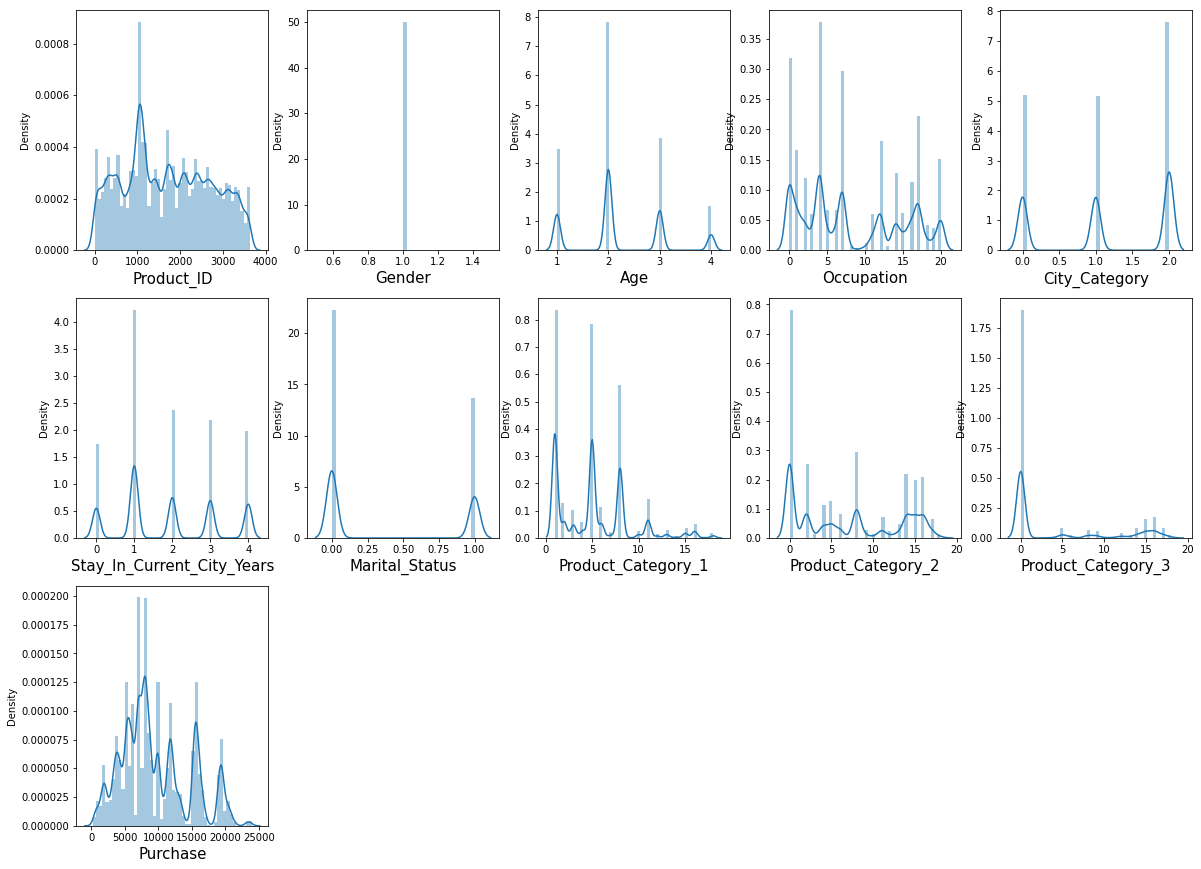

In [155]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    ax=plt.subplot(3,5,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)
    
    plotnumber+=1
    
plt.show()

In [156]:
# plotting boxplot again 

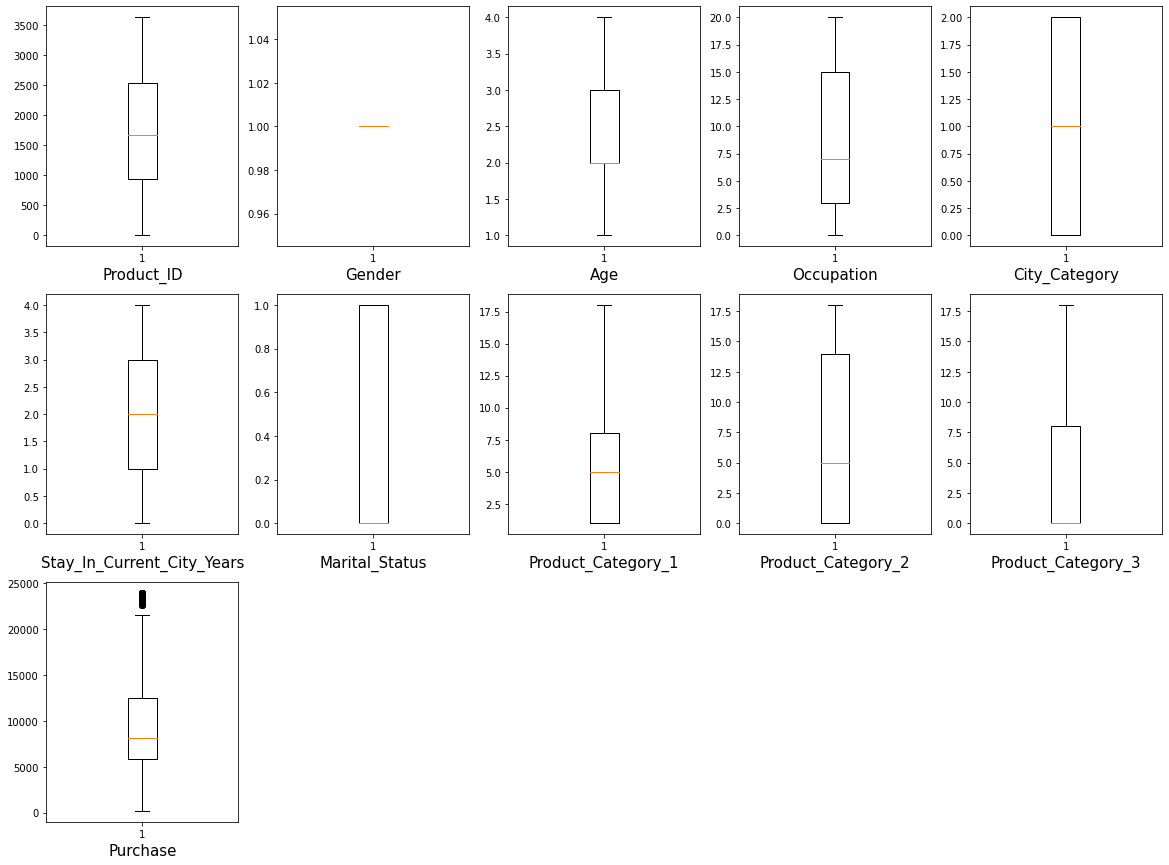

In [157]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    ax=plt.subplot(3,5,plotnumber)
    plt.boxplot(df[column])
    plt.xlabel(column,fontsize=15)
    
    plotnumber+=1
    
plt.show()

In [158]:
# plotting heatmap for dataset checking correlation among columns

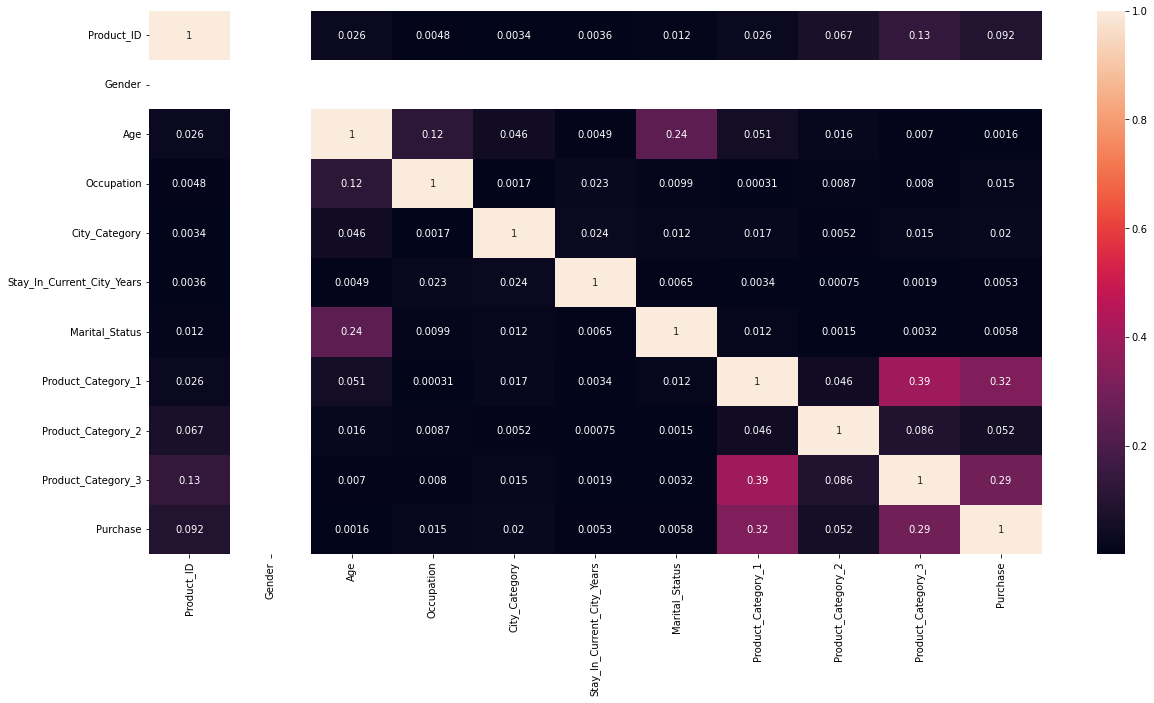

In [159]:
corr = df.corr().abs()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

plt.show()

In [160]:
# heatmap is not showing any type of relation among columns

In [161]:
# splitting dataset into two variables for further processing

In [162]:
x = df.drop(columns='Purchase')
y = df.Purchase

In [163]:
# scatter plot for data of "x" varying to data of "y"

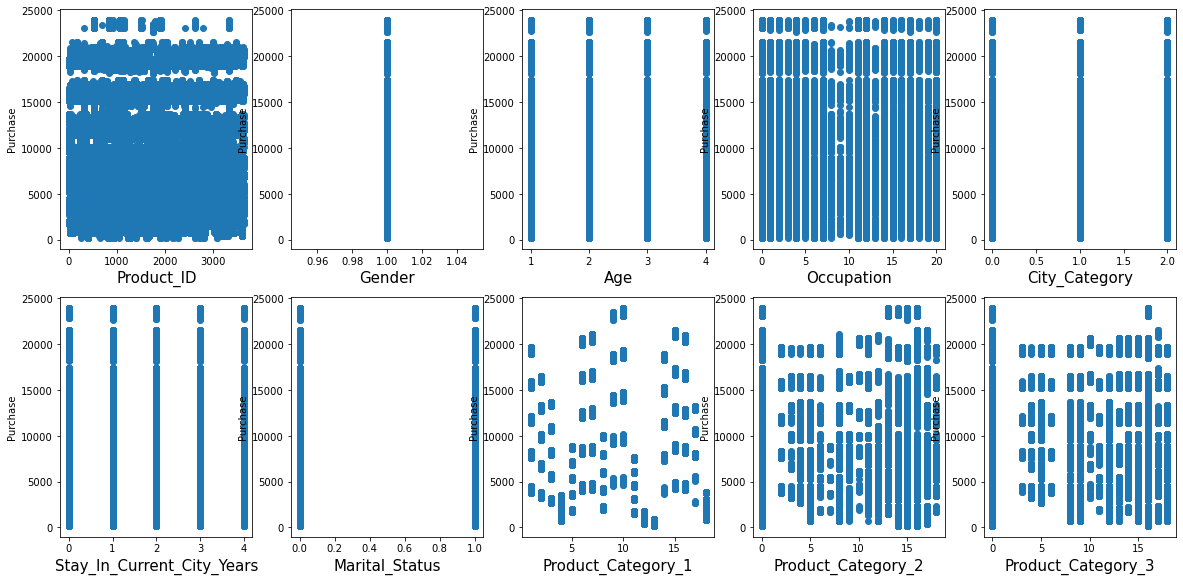

In [164]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in x:
    ax=plt.subplot(3,5,plotnumber)
    plt.scatter(x[column],y)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('Purchase')
    
    plotnumber+=1
    
plt.show()

In [165]:
# in different type data is scattered 

In [166]:
# importing standard_scaler and train_test_split for data processing  before training of the model

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [168]:
# standardize the data 

In [169]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [170]:
# train_test_split

In [171]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=40)

In [172]:
# importing different metrics for checking the error of model

In [173]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [174]:
# first model Linear Regression

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [177]:
lr_pred = lr.predict(x_test)

In [178]:
lr.score(x_train,y_train)

0.1400953141364707

In [179]:
lr.score(x_test,y_test)

0.13875554799789636

In [180]:
# linear regression is giving very low score on train and test data

In [181]:
# scatter plot for predicted data and test data

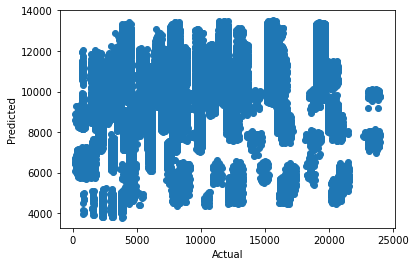

In [182]:
plt.scatter(y_test,lr_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [183]:
mean_absolute_error(y_test,lr_pred)

3609.065840769986

In [184]:
mean_squared_error(y_test,lr_pred)

21883643.49681334

In [185]:
np.sqrt(mean_squared_error(y_test,lr_pred))

4677.9956708844165

In [186]:
# here is all about the error of this linear regression

In [187]:
# second model Decision Tree 

In [188]:
from sklearn.tree import DecisionTreeRegressor

In [189]:
dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [190]:
dt_pred = dt.predict(x_test)

In [191]:
dt.score(x_train,y_train)

0.9602451638243776

In [192]:
dt.score(x_test,y_test)

0.43795443441493354

In [193]:
# this model is giving good accuracy on train data and some low accuracy on test data

In [194]:
# scatter plot for predicted data and test data

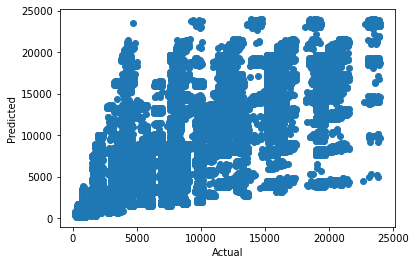

In [195]:
plt.scatter(y_test,dt_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [196]:
mean_absolute_error(y_test,dt_pred)

2686.5849534377617

In [197]:
mean_squared_error(y_test,dt_pred)

14281200.601798907

In [198]:
np.sqrt(mean_squared_error(y_test,dt_pred))

3779.0475786630295

In [199]:
# here is the error of model Decision Tree

In [200]:
# third and fourth model Random Forest and AdaBoost

In [201]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [202]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

RandomForestRegressor()

In [203]:
rf_pred = rf.predict(x_test)

In [204]:
rf.score(x_train,y_train)

0.9254657324122951

In [205]:
rf.score(x_test,y_test)

0.6568414601590431

In [206]:
# Rabdom Forest is giving good accuracy on train data and good accuracy on test data

In [207]:
# scatter plot for predicted data and test data

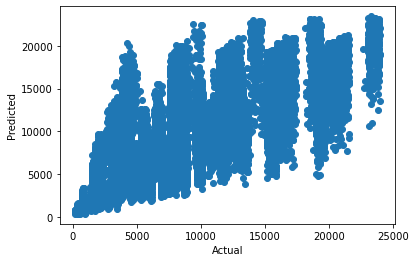

In [208]:
plt.scatter(y_test,rf_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [209]:
mean_absolute_error(y_test,rf_pred)

2178.8055685517465

In [210]:
mean_squared_error(y_test,rf_pred)

8719428.184772998

In [211]:
np.sqrt(mean_squared_error(y_test,rf_pred))

2952.867789924398

In [212]:
# here is all about the error of this model 

In [213]:
ada = AdaBoostRegressor()

ada.fit(x_train,y_train)

AdaBoostRegressor()

In [214]:
ada_pred = ada.predict(x_test)

In [215]:
ada.score(x_train,y_train)

0.48244241478671235

In [216]:
ada.score(x_test,y_test)

0.4833215807041624

In [217]:
# this model is giving average score on train data and test data

In [218]:
# scatter plot for predicted data and test data

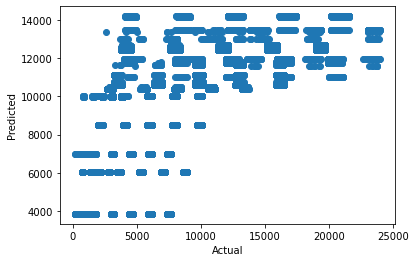

In [219]:
plt.scatter(y_test,ada_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [220]:
mean_squared_error(y_test,ada_pred)

13128451.862978775

In [221]:
mean_absolute_error(y_test,ada_pred)

2842.651208912425

In [222]:
np.sqrt(mean_squared_error(y_test,ada_pred))

3623.320557579577

In [223]:
# here is the error of this model

In [224]:
# fifth model XGB

In [225]:
import xgboost as xgb

In [226]:
xgb = xgb.XGBRegressor()

xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [227]:
xgb_pred = xgb.predict(x_test)

In [228]:
xgb.score(x_train,y_train)

0.7247264671634639

In [229]:
xgb.score(x_test,y_test)

0.7119712053065508

In [230]:
# this model is giving good score on train and test data

In [231]:
# scatter plot for predicted data and test data

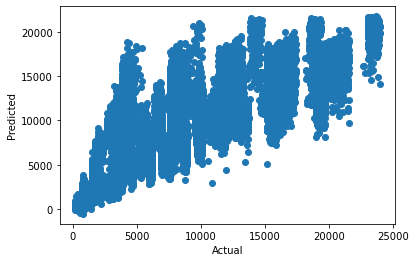

In [232]:
plt.scatter(y_test,xgb_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [233]:
mean_absolute_error(y_test,xgb_pred)

2034.959841137303

In [234]:
mean_squared_error(y_test,xgb_pred)

7318618.361181487

In [235]:
np.sqrt(mean_squared_error(y_test,xgb_pred))

2705.294505443259

In [236]:
# error of this model is here

In [237]:
# Hyperparameter tuning for Random Forest and AdaBoost

In [238]:
# for Random Forest Regressor

In [239]:
from sklearn.model_selection import GridSearchCV

In [240]:
param_grid = {'n_estimators':[10,15],'max_depth':[10,15],'max_features':[5,0],'bootstrap':[True,False]}

In [241]:
grd_srch = GridSearchCV(RandomForestRegressor(),param_grid,cv=10)

In [242]:
grd_srch.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15],
                         'max_features': [5, 0], 'n_estimators': [10, 15]})

In [243]:
grd_srch.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=15, max_features=5,
                      n_estimators=15)

In [244]:
rf1 = RandomForestRegressor(bootstrap=False,max_depth=15,max_features=5,n_estimators=15)

rf1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=15, max_features=5,
                      n_estimators=15)

In [245]:
rf1_pred = rf1.predict(x_test)

In [246]:
rf1.score(x_train,y_train)

0.7634248843107284

In [247]:
rf1.score(x_test,y_test)

0.695829014881737

In [248]:
# After hyperparameter tuning Random Forest is giving better result

In [249]:
# scatter plot predicted data and test data

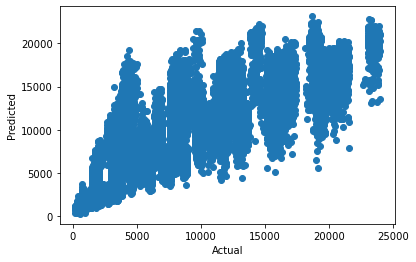

In [250]:
plt.scatter(y_test,rf1_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [251]:
mean_absolute_error(y_test,rf1_pred)

2100.80782311012

In [252]:
mean_squared_error(y_test,rf1_pred)

7728780.585963441

In [253]:
np.sqrt(mean_squared_error(y_test,rf1_pred))

2780.068449870154

In [254]:
# also, error has improved after doing hyperparameter tuning

In [255]:
# for AdaBoost Regressor

In [256]:
from sklearn.model_selection import RandomizedSearchCV

In [257]:
param_distributions = {'n_estimators':[10,20,30,40],'learning_rate':[0.25,0.30,0.35,0.40]}

In [258]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),param_distributions,cv=5)

In [259]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.35, 0.4],
                                        'n_estimators': [10, 20, 30, 40]})

In [260]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=10)

In [261]:
ada1 = AdaBoostRegressor(learning_rate=0.25,n_estimators=10)

ada1.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.25, n_estimators=10)

In [262]:
ada1_pred = ada1.predict(x_test)

In [263]:
ada1.score(x_train,y_train)

0.4613156327943557

In [264]:
ada1.score(x_test,y_test)

0.45990700635324067

In [265]:
# Ada boost is not improving any more 

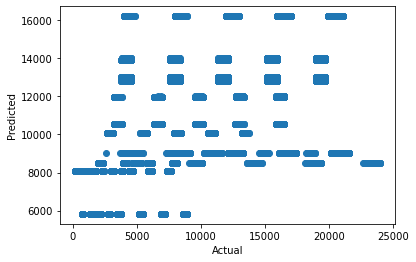

In [266]:
plt.scatter(y_test,ada1_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [267]:
mean_absolute_error(y_test,ada1_pred)

2829.137027855576

In [268]:
mean_squared_error(y_test,ada1_pred)

13723400.482425962

In [269]:
np.sqrt(mean_squared_error(y_test,ada1_pred))

3704.5108290334315

In [270]:
# here is the error of this tuned model

In [271]:
# now its time to consider the best model 
# importing pickle
# considering tuned RandomForest for saving

In [272]:
import pickle

In [274]:
pickle.dump(rf1,open('Rf_Black_Friday','wb'))